# Objective: 

* Explore the data and visualize using exploratory data analysis. 
* Build a linear regression model to predict the prices of used cars.
* Generating a set of insights and recommendations which will help the company.


# Data:
* S.No. : Serial Number
* Name : Name of the car which includes Brand name and Model name
* Location : The location in which the car is being sold or is available for purchase Cities
* Year : Manufacturing year of the car
* Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner : Type of ownership
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
* Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

### Importing necessary libraries

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the Data

In [2]:
data = pd.read_csv('used_cars_data.csv')

In [3]:
#copying the data to another varaible to avoid any chnages to original data
df = data.copy()

### View the first and last 5 rows of the dataset

In [4]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


**Observations**

* We can drop S.No. as we can work with default ID.

In [6]:
df.drop('S.No.',axis=1, inplace=True) # to drop the coloumn'S.No.' .

In [7]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Find out car brand name from NAME variable

In [8]:
df['Brand'] = df['Name'].str.split(' ').str[0] #Separating Brand name from the Name

In [9]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi


### Shape of the Dataset

In [10]:
df.shape

(7253, 14)

**Observations**

* Dataset has 7253 rows and 14 coloumns

### Dataframe Info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Brand              7253 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 793.4+ KB


**Observations**

* Name, Location, Fuel_Type, Transmission, Owner_Type, and Brand should be categorical Variables.
* Mileage, Engine, Power, and New_Price should be numerical variables.
* The dependent variable is Price(used car).

### Processing the Columns

#### New_Price Column

In [12]:
def Nprice_to_num(nprice):
    """This function takes in a string representing a New Price in Lakh and Cr
    and converts it to a number. For example, '22 Lakh'  will become 2200000.00
    """
    if isinstance(nprice, str):  # checks if `nprice` is a string
        multiplier = 1  # handles Lakh and Cr values
        if nprice.endswith('Lakh'):
            multiplier = 100000
        elif nprice.endswith('Cr'):
            multiplier = 10000000
        return float(nprice.replace('Lakh', '').replace('Cr','')) * multiplier


df['New_Price'] = df['New_Price'].apply(Nprice_to_num)
    
df['New_Price'].head(10)

0          NaN
1          NaN
2     861000.0
3          NaN
4          NaN
5          NaN
6          NaN
7    2100000.0
8          NaN
9          NaN
Name: New_Price, dtype: float64

#### Price Column

In [13]:
def price_converter(uprice): # creating a function to convert price
    return uprice * 100000
    
    
df['Price'] = df['Price'].apply(price_converter)
    
df['Price'].head(10)

0     175000.0
1    1250000.0
2     450000.0
3     600000.0
4    1774000.0
5     235000.0
6     350000.0
7    1750000.0
8     520000.0
9     195000.0
Name: Price, dtype: float64

**Observations**

* Converted the New_Price variable into a numerical variable and also removed units from the values in the variable.
* Removed units from the values in Price Variable.

#### Mileage, Enginer and Power Column's

In [14]:
df['Mileage'] = df['Mileage'].apply(lambda x: str(x).split(' ')[0]).astype(float)
df['Engine'] = df['Engine'].apply(lambda x: str(x).split(' ')[0]).astype(float)
df['Power'] = df['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)

#### Name,Location,Fuel_Type,Transmission and Owner_Type

In [15]:
df['Name'] = df.Name.astype('category')
df['Brand'] = df.Brand.astype('category')
df['Location'] = df.Location.astype('category')
df['Fuel_Type'] = df.Fuel_Type.astype('category')
df['Transmission'] = df.Transmission.astype('category')
df['Owner_Type'] = df.Owner_Type.astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7207 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Brand              7253 non-null   category
dtypes: category(6), float64(6), int64(2)
memory usage: 601.3 KB


**Observations**

* Removed units for variables Mileage, Engine, and power.
* Converted Mileage, Engine, and Power in to float.
* Converted Name, Brand, Location, Fuel_Type, Transmission, and Owner_Type are converted into categorical variables.

### Missing  Values

In [17]:
df.isnull().sum() # to findout NULL values

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
Brand                   0
dtype: int64

In [18]:
df.isna().sum() # to findout missing values in the dataset

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
Brand                   0
dtype: int64

**Observations**

* Mileage, Engine, Power, Seats, New_Price and Price have missing values.
* New_Price has the highest number of missing values.

### Fixing Missing Values

In [19]:
# importing the MICE from fancyimpute library 
from fancyimpute import IterativeImputer 
mice_imputer = IterativeImputer()  
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = mice_imputer.fit_transform(df[numeric_columns]) 

In [20]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
dtype: int64

In [21]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
dtype: int64

**Observations**

* Fixed missing values by doing fancyimpute.

### Finding out Duplicates

In [22]:
duplicate = df[df.duplicated()] 
duplicate

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
6582,Honda City 1.5 E MT,Mumbai,2010.0,52000.0,Petrol,Manual,First,17.0,1497.0,118.0,5.0,1.450122e+06,744544.166993,Honda


**Observations**

* Found one duplicate value

### Finding out unique vlaues

In [23]:
df.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7253.000000,7253.000000,7253.000000,7253.000000,7.253000e+03,7.253000e+03,7253
unique,2041,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,33
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,Maruti
freq,55,949,NaN,NaN,3852,5204,5952,NaN,NaN,NaN,NaN,NaN,NaN,1444
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,18.142254,1618.366610,110.810270,5.282035,1.857390e+06,9.482067e+05,NaN
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,4.562259,595.129345,54.987476,0.810805,2.049540e+06,1.091812e+06,NaN
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,0.000000,0.000000,-4.248356e+05,-6.254212e+05,NaN
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,74.000000,5.000000,8.610479e+05,3.600000e+05,NaN
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,18.160000,1493.000000,93.700000,5.000000,1.252351e+06,5.950000e+05,NaN
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1968.000000,138.030000,5.000000,2.138602e+06,1.059659e+06,NaN


In [24]:
df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               440
Engine                196
Power                 430
Seats                  62
New_Price            6865
Price                2602
Brand                  33
dtype: int64

**Observations**

* Total 2041 unique vehicles are given in the data set which are from 33 different car brands.
* New_Price has the highest number of unique values followed by kilometers driven.

### Univariate Analysis

In [25]:
def dist_boxplot(var,figsize=(15,10), bins = None):
    f2, (ax_box, ax_dist) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(var, ax=ax_box, color='orange' ) # boxplot will be created
    sns.distplot(var, ax=ax_dist) # distplot will be created
    ax_dist.axvline(np.mean(var), color='red', linestyle='--') # Add mean to the histogram
    ax_dist.axvline(np.median(var), color='green', linestyle='-') # Add median to the histogram

#### Explore dependent variable Price

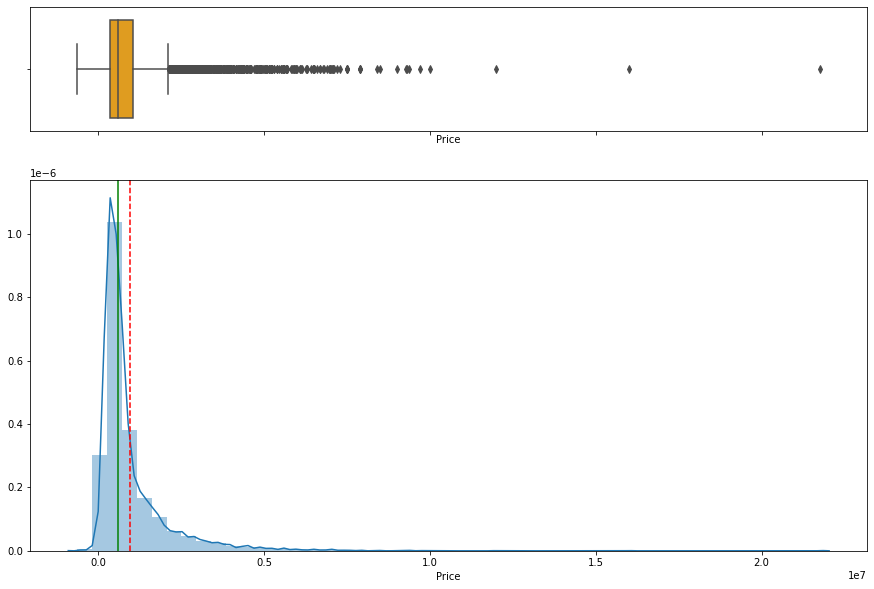

In [26]:
dist_boxplot(df.Price)

**Observations**

* The price variable is rightly skewed, which means some of the used car prices are more than 10 Lakhs.
* The mean price of a used car is between 8-9 Lakhs.

### Distribution of Numerical Variables

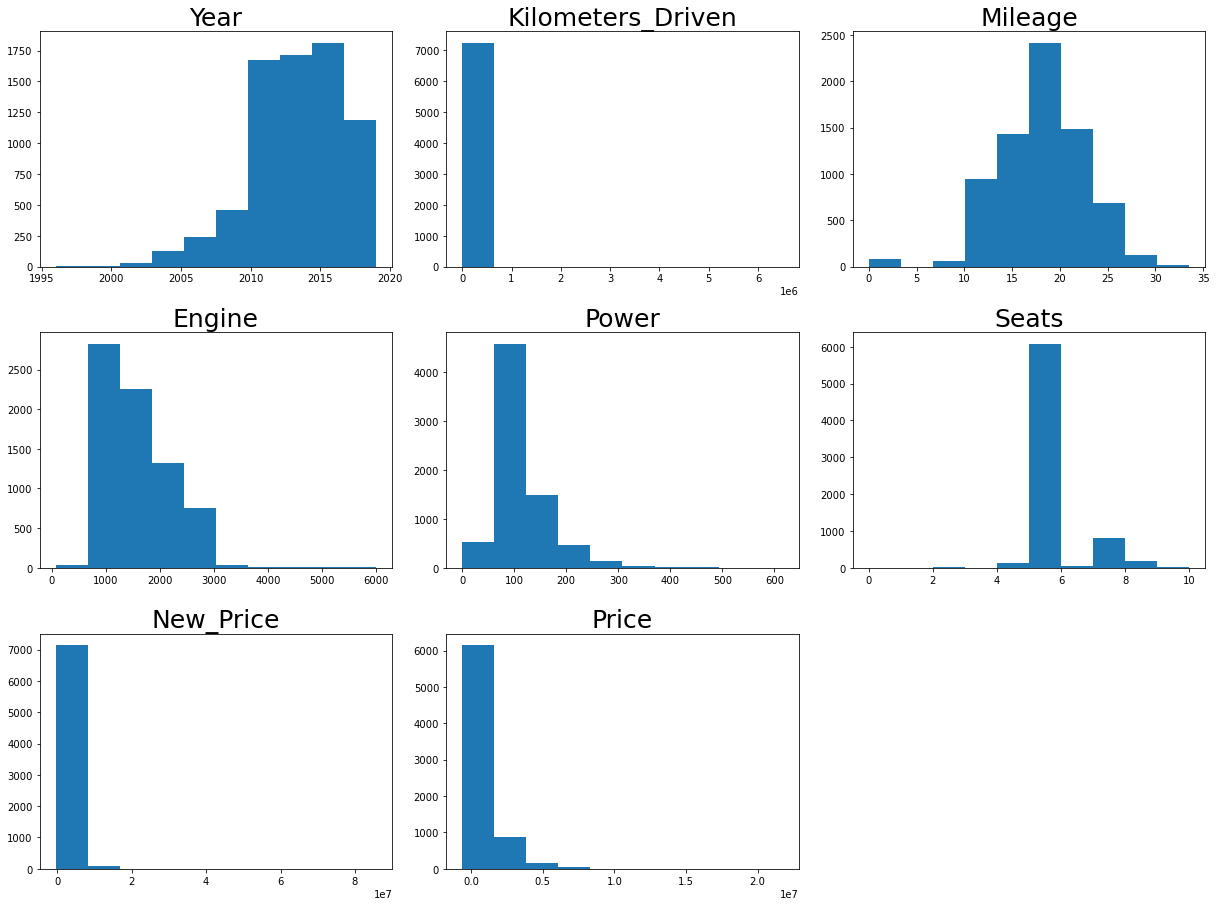

In [27]:
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

**Observations**

* Year variable is left-skewed, which means most vehicles are between 2010 and 2019.
* Mileage has a normal distribution.
* The engine has a somewhat normal distribution.
* The majority of the cars are five-seaters.

### Detecting Outliers

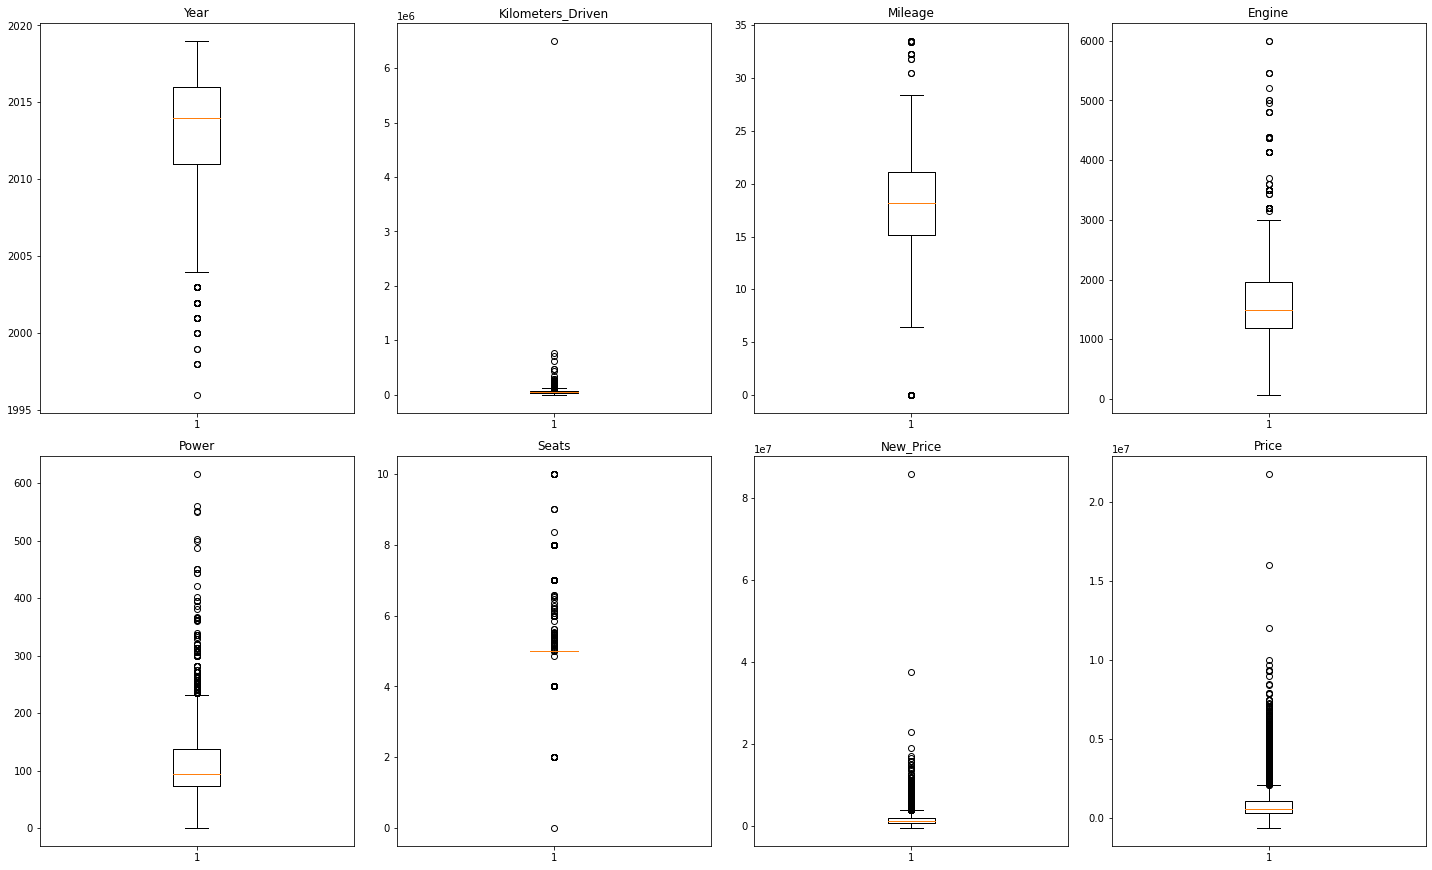

In [28]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))
for i, variable in enumerate(all_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

**Observations**

* There are outliers in every numerical variable.
* Year variables have lower outliers.
* Mileage and seat variables have both upper and lower outliers.
* All other numerical variables have upper outliers.
* Need to treat these outliers for further analysis because these might affect the predictive power of the linear model.

### Univariate Analysis on Categorical Variables

In [29]:
def bar_perc(plot,var): # Creating a function for countplot.
   
    total = len(var)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

#### Location

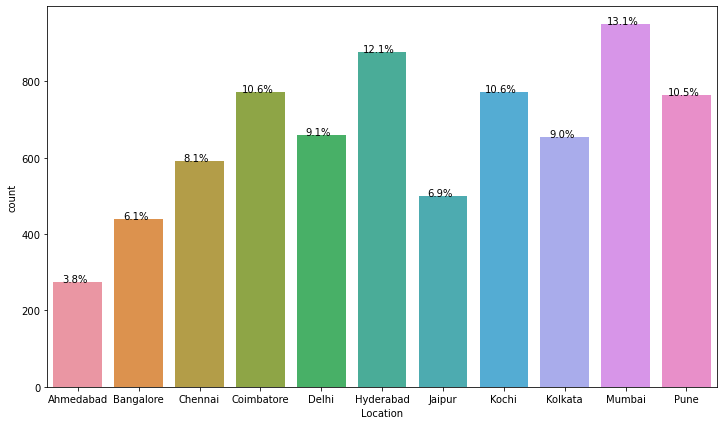

In [30]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df["Location"])
bar_perc(ax,df["Location"])

**Obersvations**

* The Mumbai region has the highest number of used cars for sale, followed by Hyderabad.
* Kochi and Coimbatore stood in 3rd place.
* Ahmedabad location has the least number of used cars for sale.

#### Fuel_Type

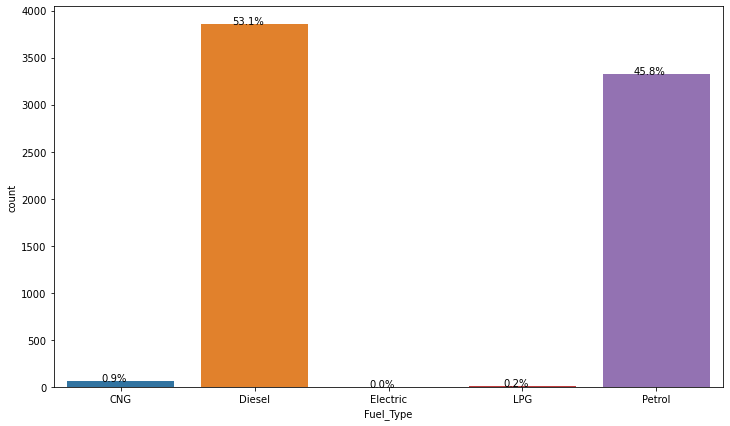

In [31]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df["Fuel_Type"])
bar_perc(ax,df["Fuel_Type"])

**Observations**

* Among all fuel types, more than 50% of cars are diesel type cars followed by petrol type cars ~46%.

#### Transmission

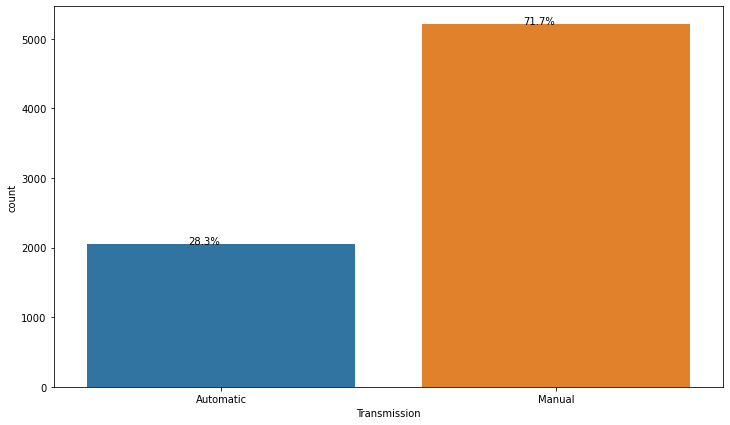

In [32]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df["Transmission"])
bar_perc(ax,df["Transmission"])

**Observations**

* In the given used cars data set, 71.8% of vehicles are manual transmission and 28.3% of cars are Automatic transmission.

#### Owner_type

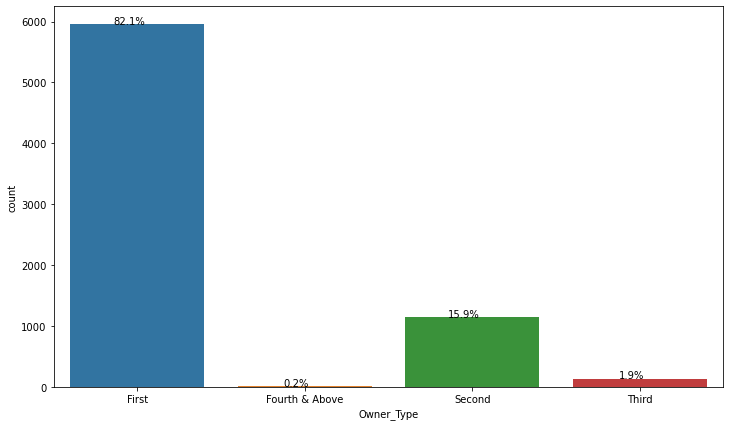

In [33]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df["Owner_Type"])
bar_perc(ax,df["Owner_Type"])

**observations**

* Among the four owner types, 82% of the cars for sale are from the first owner, followed by the second owner with ~ 16%..


#### Brand

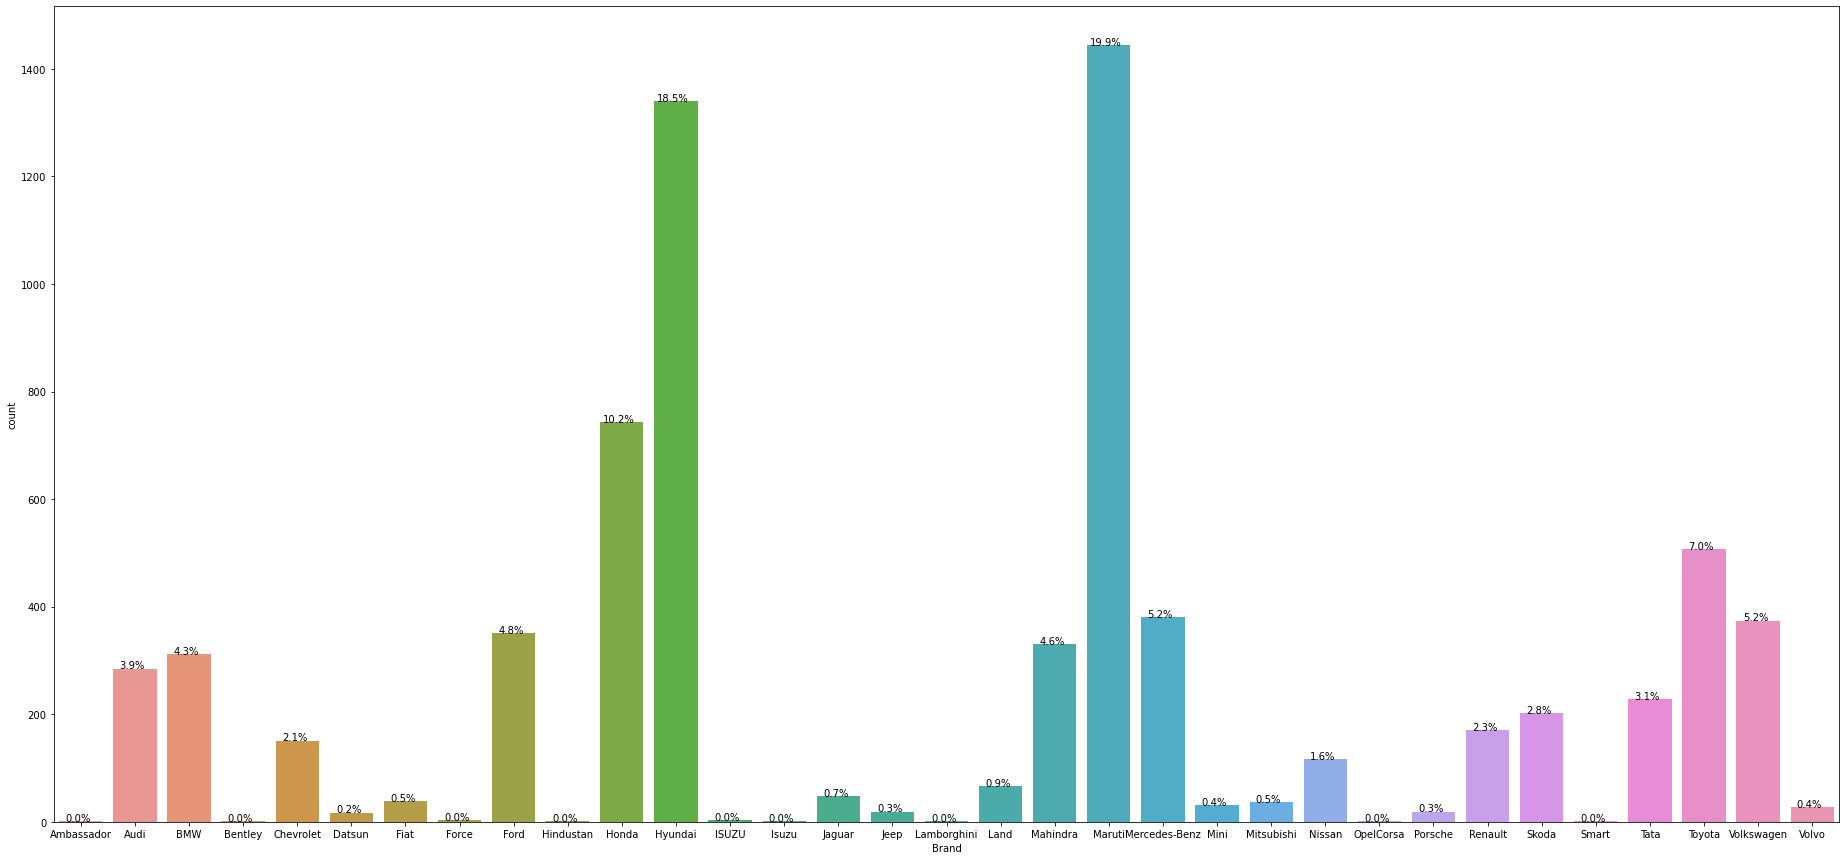

In [34]:
plt.figure(figsize=(32,15))
ax = sns.countplot(df["Brand"])
bar_perc(ax,df["Brand"])

**Observations**

* Among 33 car brands,20% of used cars for sale are Maruti car brands, followed by Hyundai with 18.5%.

### Bivariatle and Multivariate Analysis

<Figure size 864x504 with 0 Axes>

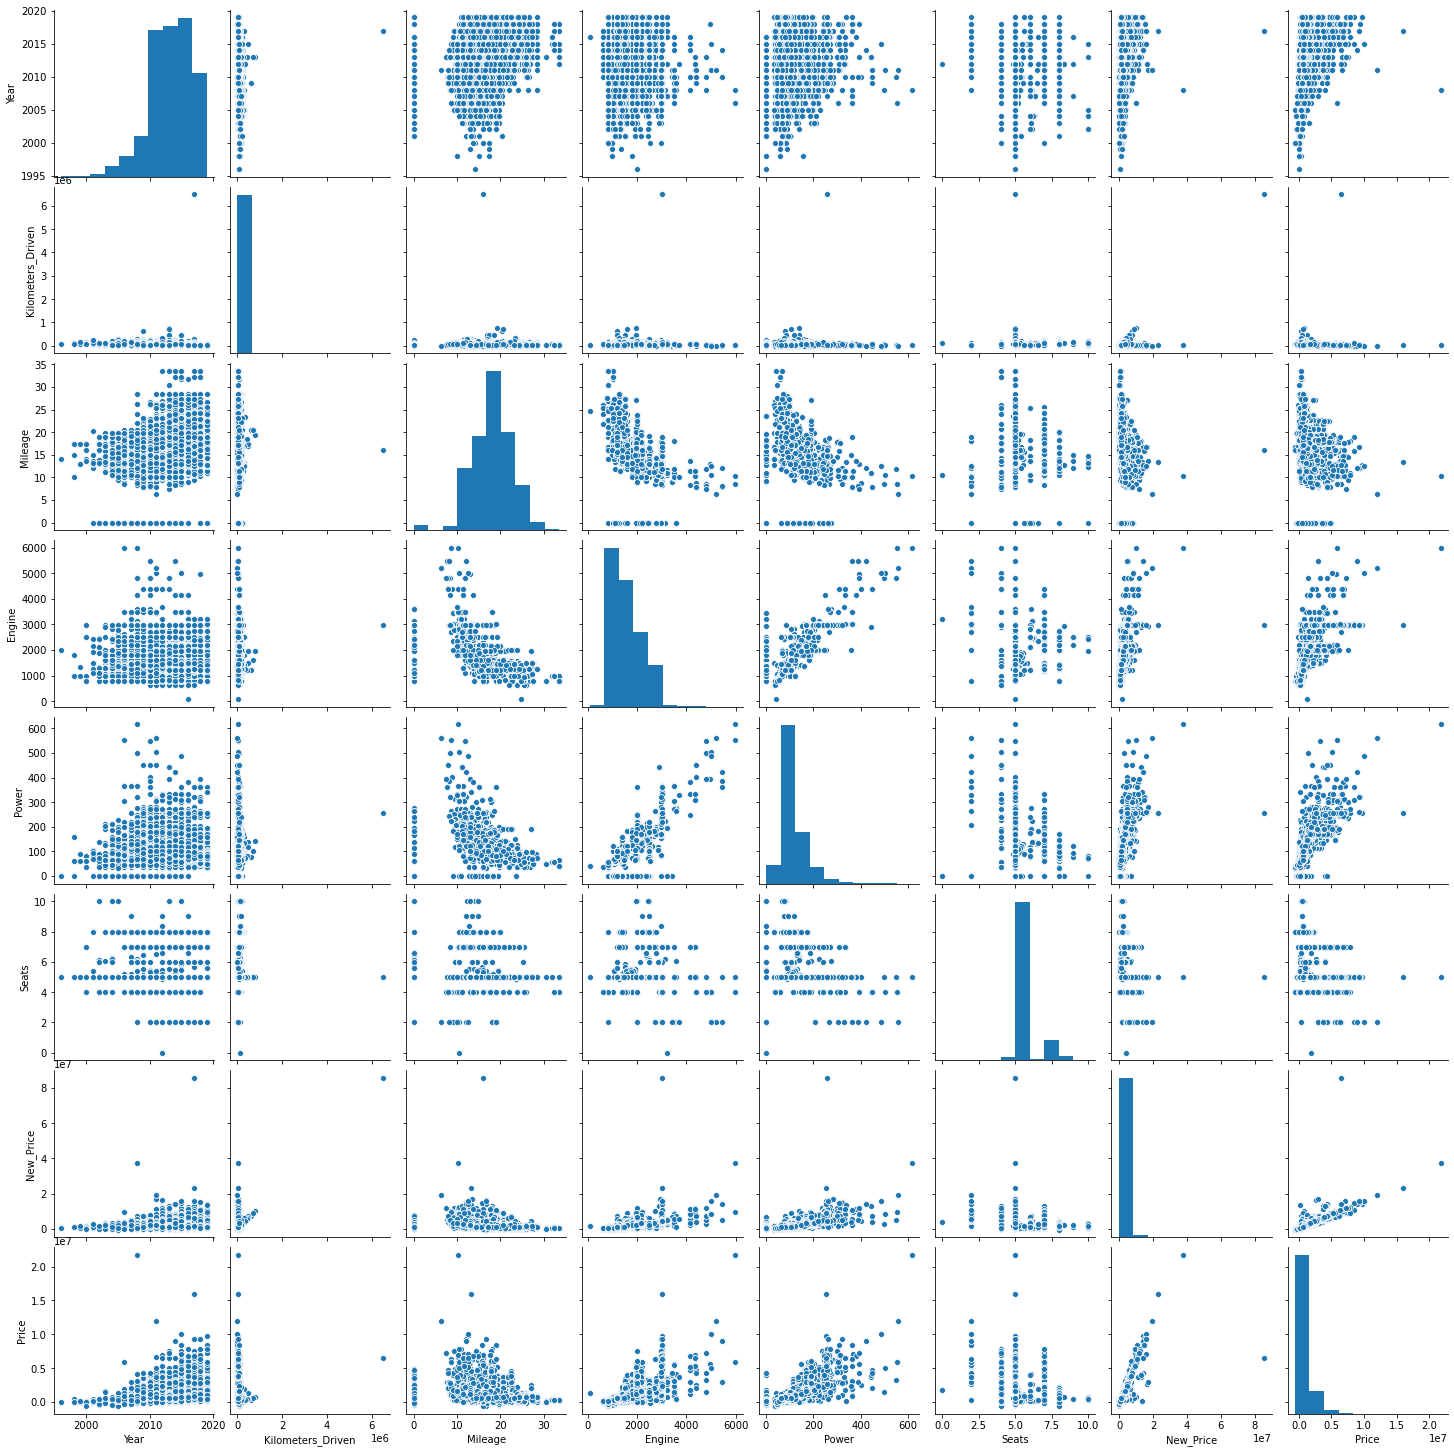

In [35]:
plt.figure(figsize=(12,7))
sns.pairplot(df)

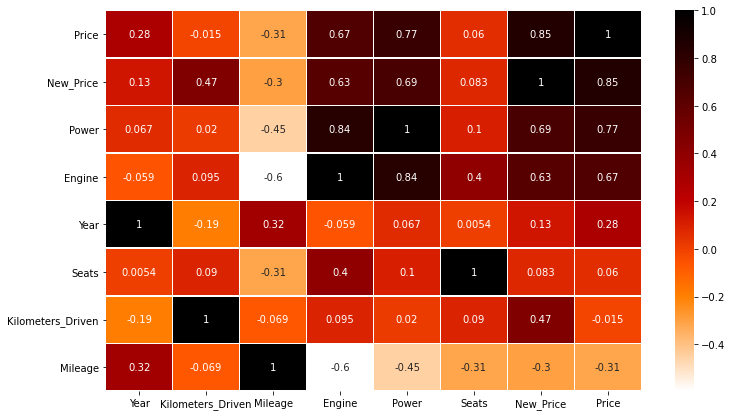

In [36]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr().sort_values(by=['Price'],ascending=False),annot=True,linewidth=.5,cmap="gist_heat_r")

**Observations**

* Used car Price is negatively correlated with Seats and Mileage.
* Used car price is highly correlated with New_Price followed by Power and Engine, which means the higher the power, and the engine higher the used car price.
* Price is somewhat correlated with vehicle model year, and it has significantly less correlation with Kilometers_Driven and Seats.

### Variables that are correlated with Price variable

#### Year Vs Price Vs Transmission

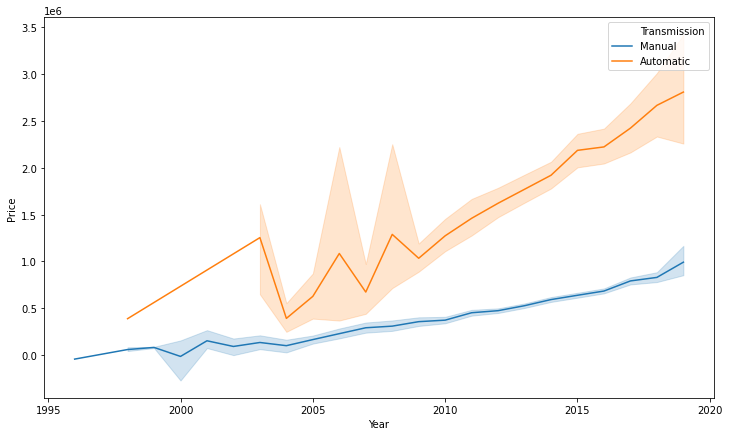

In [37]:
plt.figure(figsize=(12,7))
sns.lineplot(x = 'Year', y = 'Price', hue = 'Transmission', data=df)

**Observations**

* As expected, the latest year model used cars' price are higher than older year models in which automatic transmission vehicle have a higher price than manual transmission vehicles.

####  Year Vs Price Vs Fuel_Type

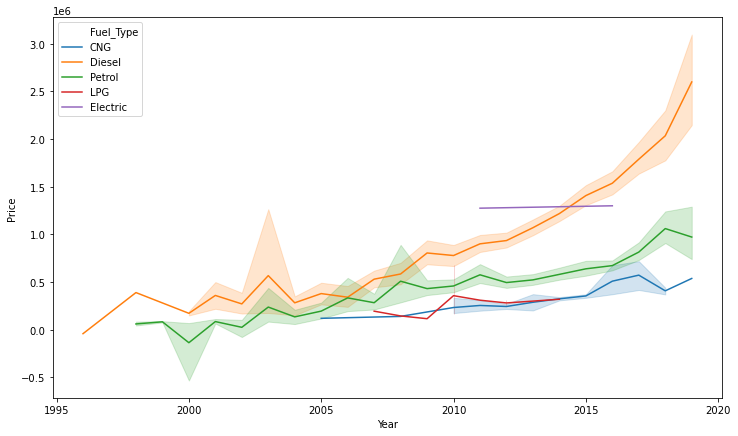

In [38]:
plt.figure(figsize=(12,7))
sns.lineplot(x = 'Year', y = 'Price', hue = 'Fuel_Type', data=df)

**Observations**

* Among the five fuel types, the latest year model car prices are higher than previous models in which diesel type vehicles have higher prices than other fuel type vehicles.

####  Year Vs Price Vs Owner_Type

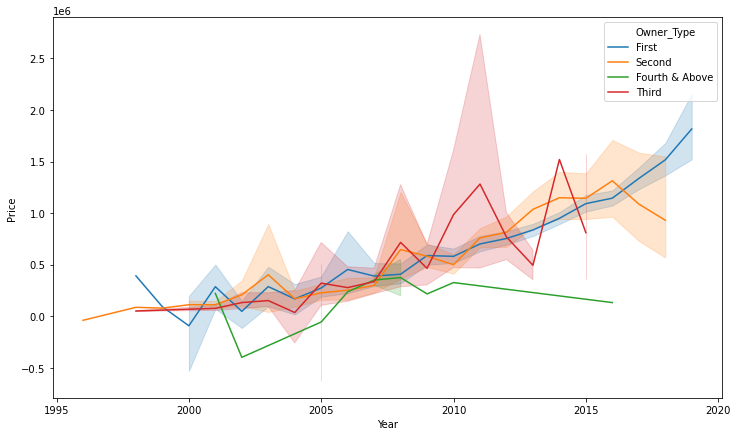

In [39]:
plt.figure(figsize=(12,7))
sns.lineplot(x = 'Year', y = 'Price', hue = 'Owner_Type', data=df)

**Observations**

* Until the year 2016, both the first and second owner type car prices are almost equal, then after second owner type car prices have decreased significantly while the first owner type car price is increased.
* From the year 2009 till 2012, third-owner-type vehicles have higher prices than other types, then prices started decreasing till the end of 2013 and then increased significantly in 2014 and then again started dropping in 2015.

#### Engine Vs Price Vs Transmission

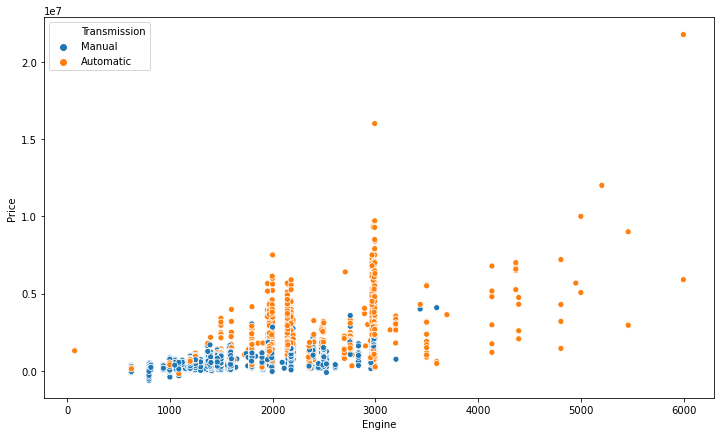

In [40]:
plt.figure(figsize=(12,7))
sns.scatterplot(x = 'Engine', y = 'Price', hue = 'Transmission', data=df)

**Observations**

* Vehicles with more engine capacity have higher prices in which automatic transmission vehicles lead the used car market than manual transmission vehicles in engine capacity and prices.

####  Power Vs Price Vs Transmission

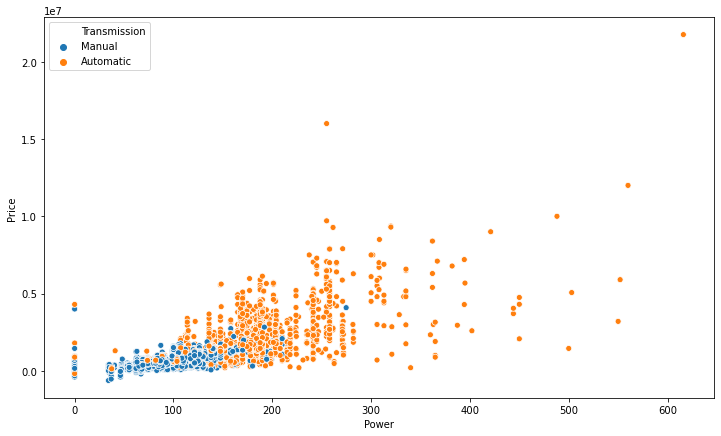

In [41]:
plt.figure(figsize=(12,7))
sns.scatterplot(x = 'Power', y = 'Price', hue = 'Transmission', data=df)

**Observations**

* Vehicles with more power have higher prices in which automatic transmission vehicles lead the used car market than manual transmission vehicles in terms of vehicle power and prices.
*  Most manual transmission vehicles are below 250 bhp in power.

#### Engine Vs Price Vs Fuel_Type

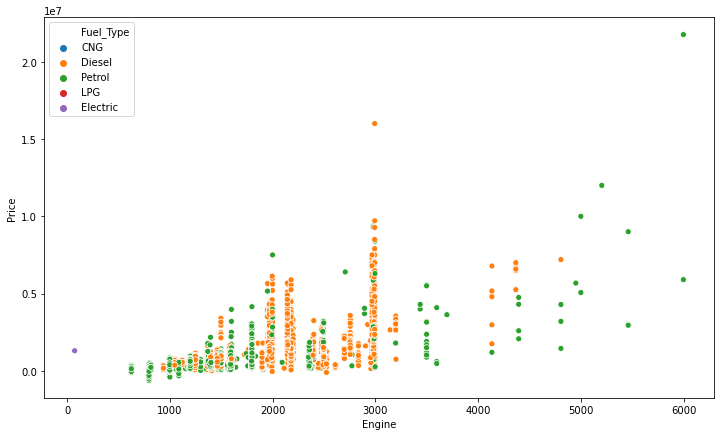

In [42]:
plt.figure(figsize=(12,7))
sns.scatterplot(x = 'Engine', y = 'Price', hue = 'Fuel_Type', data=df)

**Observations**

* Petrol fuel type cars have the highest engine power among five fuel type vehicles, followed by diesel type vehicles.

####  Power Vs Price Vs Fuel_Type

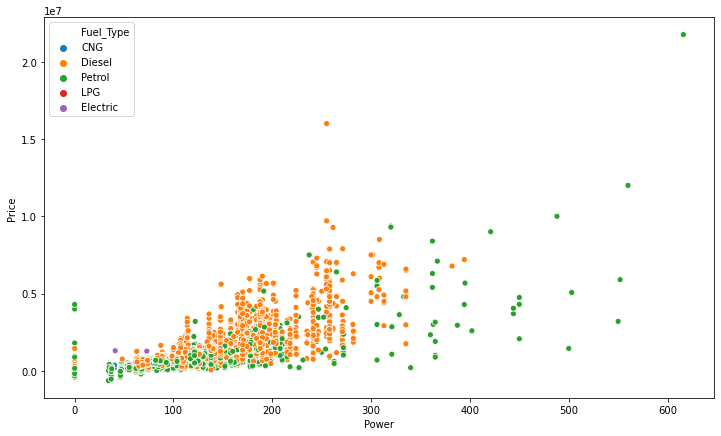

In [43]:
plt.figure(figsize=(12,7))
sns.scatterplot(x = 'Power', y = 'Price', hue = 'Fuel_Type', data=df)

**Observations**

* Petrol fuel type cars have the highest horsepower among five fuel type vehicles, followed by diesel type vehicles.

#### Engine Vs Price Vs Owner_Type

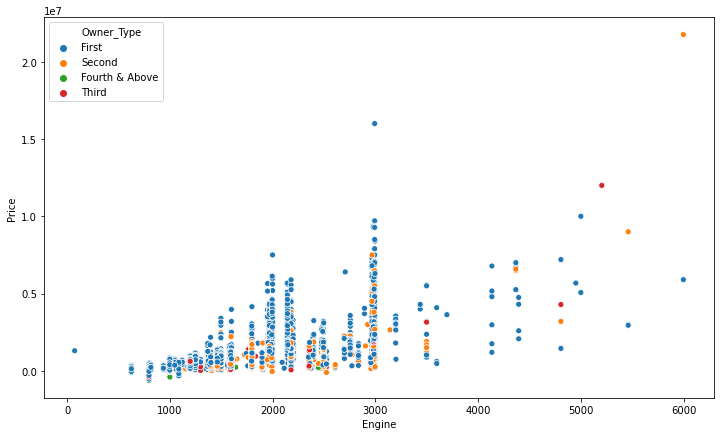

In [44]:
plt.figure(figsize=(12,7))
sns.scatterplot(x = 'Engine', y = 'Price', hue = 'Owner_Type', data=df)

**Observations**

* Among four owner-type vehicles, both first and second-owner-type cars are spread across all engine power(max 6000), where the highest number of vehicles are at 3000 Engine power.

### Fixing Outliers

In [45]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [46]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

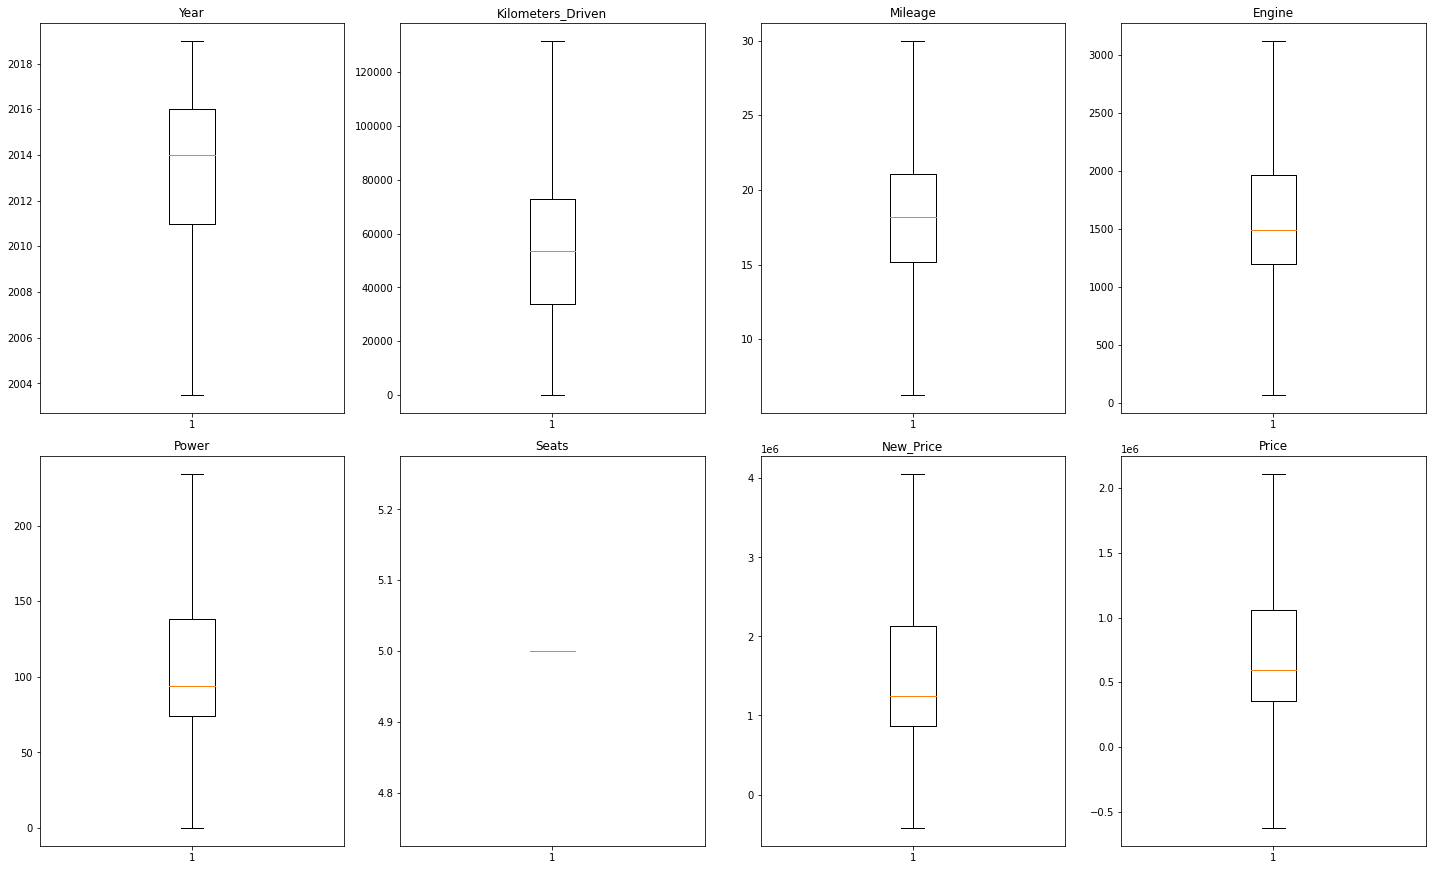

In [47]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

**Observations**

* Outliers has been treated.

### Building Model

In [97]:
#Defining X and y variables
X = df.drop(['Price','Name'], axis=1)
y = df[['Price']]

print(X.head())
print(y.head())

     Location    Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010.0            72000.0       CNG       Manual      First   
1        Pune  2015.0            41000.0    Diesel       Manual      First   
2     Chennai  2011.0            46000.0    Petrol       Manual      First   
3     Chennai  2012.0            87000.0    Diesel       Manual      First   
4  Coimbatore  2013.0            40670.0    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats     New_Price    Brand  
0    26.60   998.0   58.16    5.0  7.599965e+05   Maruti  
1    19.67  1582.0  126.20    5.0  2.137947e+06  Hyundai  
2    18.20  1199.0   88.70    5.0  8.610000e+05    Honda  
3    20.77  1248.0   88.76    5.0  1.621794e+06   Maruti  
4    15.20  1968.0  140.80    5.0  2.982274e+06     Audi  
       Price
0   175000.0
1  1250000.0
2   450000.0
3   600000.0
4  1774000.0


In [98]:
print(X.shape)
print(y.shape)

(7253, 12)
(7253, 1)


### Creating Dummy Variables

Categorical variables cannot be read into an equation. So, creating dummy variables(Ture or False) columns for Fuel_Type, Transmission and Owner_Type variables.

In [99]:
X = pd.get_dummies(X, columns=['Fuel_Type','Transmission','Owner_Type','Location','Brand'], drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,...,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010.0,72000.0,26.60,998.0,58.16,5.0,7.599965e+05,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015.0,41000.0,19.67,1582.0,126.20,5.0,2.137947e+06,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011.0,46000.0,18.20,1199.0,88.70,5.0,8.610000e+05,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012.0,87000.0,20.77,1248.0,88.76,5.0,1.621794e+06,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013.0,40670.0,15.20,1968.0,140.80,5.0,2.982274e+06,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [101]:
X_train.shape

(5077, 57)

### Scaling (converting the values in to Z-scores)

In [102]:
#Sclaing only on training set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # creating instance of Standard Scaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
X_train = pd.DataFrame(X_train) # converting back to dataframe after scaling.
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.503937,0.052429,-1.505217,0.322477,1.590470,0.0,2.207245,-1.073823,0.0,-0.037157,...,-0.132811,-0.014036,-0.046598,-0.162107,-0.177458,-0.014036,-0.178047,-0.277497,-0.232797,-0.056227
1,1.445769,-1.780162,-1.074238,-0.029115,1.486806,0.0,2.207245,-1.073823,0.0,-0.037157,...,-0.132811,-0.014036,-0.046598,-0.162107,-0.177458,-0.014036,-0.178047,-0.277497,-0.232797,-0.056227
2,-0.123951,-1.078949,1.497733,-1.453242,-1.285164,0.0,-1.281116,-1.073823,0.0,-0.037157,...,-0.132811,-0.014036,-0.046598,-0.162107,-0.177458,-0.014036,-0.178047,-0.277497,-0.232797,-0.056227
3,0.189993,1.619102,-1.215581,1.561929,-0.180108,0.0,0.883306,0.931252,0.0,-0.037157,...,-0.132811,-0.014036,-0.046598,-0.162107,-0.177458,-0.014036,-0.178047,3.603641,-0.232797,-0.056227
4,0.189993,1.384521,-0.128865,0.627901,1.348518,0.0,1.437489,0.931252,0.0,-0.037157,...,-0.132811,-0.014036,-0.046598,-0.162107,-0.177458,-0.014036,-0.178047,-0.277497,-0.232797,-0.056227


### Choose Model, Train and Evaluate

In [104]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)      

Intercept of the linear equation: [802595.61007608]

COefficients of the equation are: [[ 5.77569615e+04 -1.61111785e+05 -2.77482911e+04  1.55647658e+04
   4.76889266e+04 -5.84870017e+15  4.68978791e+05  9.98598520e+03
  -1.34685621e+15 -9.05875000e+02 -2.10303750e+04 -1.59262500e+04
  -7.48425000e+03 -3.79750000e+03  4.07218750e+02  3.35000000e+02
  -6.04450000e+03  1.09450000e+03 -6.98512500e+03  3.65300000e+03
  -4.91825000e+03 -5.69300000e+03 -1.31060000e+04 -8.70518750e+03
  -3.14700000e+03  6.25900000e+03 -5.07600000e+03  7.43312500e+02
  -1.00606250e+04 -4.49812500e+03 -4.43403125e+03 -3.79796875e+02
  -1.03701875e+04 -4.30078125e+02 -1.17744219e+04 -1.37172500e+04
  -1.75800000e+03  0.00000000e+00 -4.03200000e+03  1.51002500e+04
  -2.94700000e+03  2.29962500e+03 -9.38887500e+03 -1.02313750e+04
   1.43193750e+03  3.05543750e+03 -1.76340625e+03 -8.56270312e+03
   2.54125000e+02 -1.59437500e+02 -7.41262500e+03 -9.45275000e+03
  -5.76125000e+02 -1.60612812e+04  7.56312500e+03 -1.45

**Observations**

* If the all the independent variables are 0 , then the Predicted Price is ~ 8.05 Lakhs.

### Model Performances

In [105]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

1237919383793.913

**Observations**

* Average difference between predicted and actual price is Rupees 71,715.65

In [106]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

40832576526360.31

**Observations**

* The standard deviation of the residuals(prediction errors) is 122,778.70(in rupees).

In [107]:
# R2 Squared: on test
r2_score(y_test, pred)

-4358912304756187.5

**Observations**

* R^2 value is 0.9595 which means that in this model independent variables are able to explain 96% of variances in dependent variable.

### Statsmodels

In [59]:
# Lets us build linear regression model using statsmodel 

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     8404.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:55:11   Log-Likelihood:                -66695.
No. Observations:                5077   AIC:                         1.334e+05
Df Residuals:                    5062   BIC:                         1.335e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations**

* P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.

* Negative values of coefficient shows that, Price deceases with their increase.

* Positive values of coefficient shows that, Price inceases with their increase.

* Based on the P-value, Fuel_Type_Diesel,Fuel_Type_LPG,Owner_Type_Fourth&Above and Owner_Type_Second are not significant. 

### Interpreting the Regression Results:

**Adjusted. R-squared**: It reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit. In our case, the value for Adj. R-squared is **0.959**, which is good!


**Std err**: It reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy.

**P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent feature is not significant 

    Ha : Independent feature is that it is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level
  - A p-value of less than 0.05 is considered to be statistically significant.

   
**Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

### Linear Regression Assumptions

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedacity
4. Linearity of variables
5. Normality of error terms

#### Multicollinearity using VIF Score



In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                        806901.811055
Year                              2.041829
Kilometers_Driven                 1.926007
Mileage                           3.036532
Engine                            6.499729
Power                             5.195493
New_Price                         4.702487
Fuel_Type_Diesel                 30.306596
Fuel_Type_Electric                1.035969
Fuel_Type_LPG                     1.201494
Fuel_Type_Petrol                 30.949921
Transmission_Manual               2.017874
Owner_Type_Fourth & Above         1.011362
Owner_Type_Second                 1.132549
Owner_Type_Third                  1.073513
dtype: float64



**Observations**

* Fuel_Type_Diesel and Fuel_Type_Petrol have a VIF score greater than 10.

### Remove MultiCollinearity

 * To remove multicollinearity
  1. Drop every column one by one, that has VIF score greater than 5.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under

In [61]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1.drop('Fuel_Type_Petrol', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                        799210.029936
Year                              2.039259
Kilometers_Driven                 1.910967
Mileage                           2.971769
Engine                            6.501955
Power                             5.221641
New_Price                         4.593481
Fuel_Type_Diesel                  2.270520
Fuel_Type_Electric                1.005322
Fuel_Type_LPG                     1.005980
Transmission_Manual               2.015386
Owner_Type_Fourth & Above         1.013297
Owner_Type_Second                 1.142457
Owner_Type_Third                  1.079615
dtype: float64



* VIF has come down to quite a reasonable limit, now we can say features are not correlated

In [62]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     9037.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:55:11   Log-Likelihood:                -66700.
No. Observations:                5077   AIC:                         1.334e+05
Df Residuals:                    5063   BIC:                         1.335e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations**

* The R-squared value was the same on both the models, and it seems quite promising.
* Fuel_Type_LPG, Owner_Type_Second and Owner_type_third have p-value greater than 0.05, so they are not significant. We will drop them.

#### Drop the Variable 'Fuel_Type_LPG'

In [63]:
X_train3 = X_train2.drop(['Fuel_Type_LPG'], axis=1)

In [64]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     9790.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:55:12   Log-Likelihood:                -66700.
No. Observations:                5077   AIC:                         1.334e+05
Df Residuals:                    5064   BIC:                         1.335e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

####  Drop the variable 'Owner_Type_Third'

In [65]:
X_train4 = X_train3.drop(['Owner_Type_Third'], axis=1)

In [66]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.068e+04
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:55:12   Log-Likelihood:                -66700.
No. Observations:                5077   AIC:                         1.334e+05
Df Residuals:                    5065   BIC:                         1.335e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Drop the varibale 'Owner_Type_Second'

In [67]:
X_train5 = X_train4.drop(['Owner_Type_Second'], axis=1)

In [68]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.175e+04
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:55:12   Log-Likelihood:                -66701.
No. Observations:                5077   AIC:                         1.334e+05
Df Residuals:                    5066   BIC:                         1.335e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now no feature has p value greater than 0.05, so we'll consider features in X_train5 as the final ones and olsres4 as final model

**Observations**
* It doesn't see any change in the Adjusted-R square value; our model can explain 96% of variance that shows the model is good.


### Check rest of the assumptions on model - olsres4
1. Mean of residuals should be 0 
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity

#### Mean of residuals

In [69]:
residual= olsres4.resid
np.mean(residual)

-2.5856602646781747e-06

* Mean of residuals is close to 0.

#### TEST FOR LINEARITY 

In [70]:
residual=olsres4.resid
fitted=olsres4.fittedvalues #predicted values

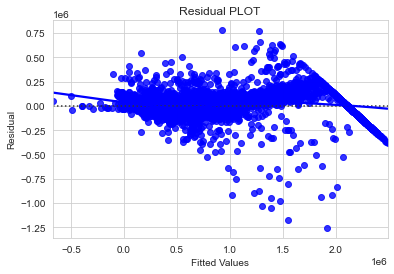

In [71]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="blue",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

* The distribution of residuals (errors) vs fitted values (predicted values) shows the signs of non-linearity in the data.

#### TEST FOR NORMALITY

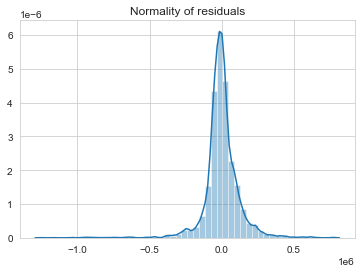

In [72]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

* The plot is slightly left-skewed, which means residuals are not in normality.

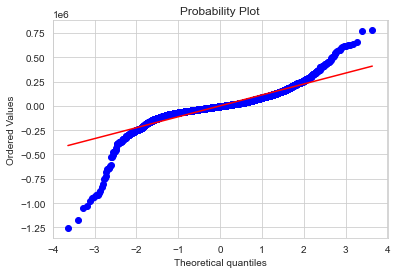

In [73]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

**Observations**

* The above QQ plot also shows that the data is not in normality.

In [74]:
stats.shapiro(residual)

ShapiroResult(statistic=0.8331995606422424, pvalue=0.0)

#### TEST FOR HOMOSCEDASTICITY

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [75]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train5)
lzip(name, test)

[('F statistic', 1.1877414299298936), ('p-value', 7.735678458888181e-06)]

* Since p-value < 0.05 we can say that the residuals are Heteroscedacity. 
* Failed to prove that there is no heteroscedasticity in the data. Hence the assumption got forgotten.

### Predicting on the test data

In [76]:
X_train5.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'New_Price', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Transmission_Manual', 'Owner_Type_Fourth & Above'],
      dtype='object')

In [77]:
X_test_final = X_test[X_train5.columns]

In [78]:
X_test_final.head()

,const,Year,Kilometers_Driven,Mileage,Engine,Power,New_Price,Fuel_Type_Diesel,Fuel_Type_Electric,Transmission_Manual,Owner_Type_Fourth & Above
2954,1.0,2016.0,30000.0,20.4,1197.0,81.80,7.974712e+05,0,0,1,0
6520,1.0,2016.0,105000.0,23.2,1248.0,73.94,1.886188e+06,1,0,1,0
6036,1.0,2009.0,131500.0,13.8,1399.0,68.00,1.948346e+06,1,0,1,0
6251,1.0,2014.0,33750.0,15.6,1196.0,70.02,9.297188e+05,0,0,1,0
6735,1.0,2017.0,35000.0,24.3,1248.0,88.50,1.065000e+06,1,0,1,0


In [79]:
y_pred = olsres4.predict(X_test_final)

### Checking the performance on train and test: metric used - RMSE

In [80]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 122867.12092074181
Test error: 122705.28130905375


**Observations**

* Now we can finally see that we have high test and train error. 

* Hence we can conclude the model is not suitable for prediction and inference purposes.

In [81]:
y_pred.head(15)

2954    5.240986e+05
6520    6.378221e+05
6036    4.547995e+05
6251    5.482781e+05
6735    6.726179e+05
2663    5.185660e+05
5686    1.098154e+06
3809    7.415429e+05
4947    5.520831e+05
7120    1.750372e+06
6849    5.935422e+05
3377    8.707089e+05
6092    5.683555e+05
3806    9.008986e+04
472     1.856627e+05
dtype: float64

## Conclusion:

### As all the assumptions are not satisfied, we cannot conclude that the predicted values are correct. Hence the given data set is not suitable for the linear regression model; we have to check with other machine learning models.

### Cannot provide any recommendations depending on the linear regression model without applying other machine learning models to the given data. The linear regression model is not suitable for the given data set.